<a href="https://colab.research.google.com/github/VarshaSriVattikonda/Python/blob/master/diagnosisprediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd

In [2]:
df=pd.read_csv('/content/Diabetes Classification.csv')

In [4]:
df.head()

,Unnamed: 0,Age,Gender,BMI,Chol,TG,HDL,LDL,Cr,BUN,Diagnosis
0,0,50,F,24,4.2,0.9,2.4,1.4,46.0,4.7,0
1,1,26,M,23,3.7,1.4,1.1,2.1,62.0,4.5,0
2,2,33,M,21,4.9,1.0,0.8,2.0,46.0,7.1,0
3,3,45,F,21,2.9,1.0,1.0,1.5,24.0,2.3,0
4,4,50,F,24,3.6,1.3,0.9,2.1,50.0,2.0,0


In [5]:
df.tail()

,Unnamed: 0,Age,Gender,BMI,Chol,TG,HDL,LDL,Cr,BUN,Diagnosis
5127,5127,54,M,23,5.00,1.50,1.24,2.98,77.0,3.50,1
5128,5128,50,F,22,4.37,2.09,1.37,2.29,47.3,4.40,1
5129,5129,67,M,24,3.89,1.38,1.14,2.17,70.6,4.73,1
5130,5130,60,F,29,5.91,1.29,1.73,2.85,50.2,7.33,1
5131,5131,37,M,34,5.42,2.66,1.08,2.87,75.5,4.61,1


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5132 entries, 0 to 5131
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  5132 non-null   int64  
 1   Age         5132 non-null   int64  
 2   Gender      5132 non-null   object 
 3   BMI         5132 non-null   int64  
 4   Chol        5132 non-null   float64
 5   TG          5132 non-null   float64
 6   HDL         5132 non-null   float64
 7   LDL         5132 non-null   float64
 8   Cr          5132 non-null   float64
 9   BUN         5132 non-null   float64
 10  Diagnosis   5132 non-null   int64  
dtypes: float64(6), int64(4), object(1)
memory usage: 441.2+ KB


In [7]:
df = df.drop(columns=["Unnamed: 0"])
df.tail(5)

,Age,Gender,BMI,Chol,TG,HDL,LDL,Cr,BUN,Diagnosis
5127,54,M,23,5.00,1.50,1.24,2.98,77.0,3.50,1
5128,50,F,22,4.37,2.09,1.37,2.29,47.3,4.40,1
5129,67,M,24,3.89,1.38,1.14,2.17,70.6,4.73,1
5130,60,F,29,5.91,1.29,1.73,2.85,50.2,7.33,1
5131,37,M,34,5.42,2.66,1.08,2.87,75.5,4.61,1


In [8]:
df['Gender'].unique()

array(['F', 'M', 'f'], dtype=object)

In [9]:
df['Gender'] = df['Gender'].map({'M':0, 'F':1, 'f':1})

In [10]:
df['Gender']

0       1
1       0
2       0
3       1
4       1
       ..
5127    0
5128    1
5129    0
5130    1
5131    0
Name: Gender, Length: 5132, dtype: int64

In [11]:
df.tail()

,Age,Gender,BMI,Chol,TG,HDL,LDL,Cr,BUN,Diagnosis
5127,54,0,23,5.00,1.50,1.24,2.98,77.0,3.50,1
5128,50,1,22,4.37,2.09,1.37,2.29,47.3,4.40,1
5129,67,0,24,3.89,1.38,1.14,2.17,70.6,4.73,1
5130,60,1,29,5.91,1.29,1.73,2.85,50.2,7.33,1
5131,37,0,34,5.42,2.66,1.08,2.87,75.5,4.61,1


In [12]:
import matplotlib.pyplot as plt
import seaborn as sns

In [13]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,5132.0,48.950312,14.048794,20.000000,36.00,49.00,59.00,93.00
Gender,5132.0,0.365549,0.481631,0.000000,0.00,0.00,1.00,1.00
BMI,5132.0,24.613406,4.277205,15.000000,22.00,24.00,27.00,47.00
Chol,5132.0,4.866882,1.001052,0.000000,4.19,4.80,5.46,11.65
TG,5132.0,1.719328,1.327057,0.000000,0.91,1.38,2.10,32.64
HDL,5132.0,1.593305,1.038849,0.000000,1.09,1.30,1.59,9.90
LDL,5132.0,2.914121,0.945423,0.300000,2.29,2.79,3.40,9.90
Cr,5132.0,71.144800,28.494394,4.860753,58.00,70.20,81.60,800.00
BUN,5132.0,4.896969,1.689206,0.500000,3.90,4.72,5.60,38.90
Diagnosis,5132.0,0.388348,0.487422,0.000000,0.00,0.00,1.00,1.00


In [14]:
df['Diagnosis'].value_counts()

Diagnosis
0    3139
1    1993
Name: count, dtype: int64

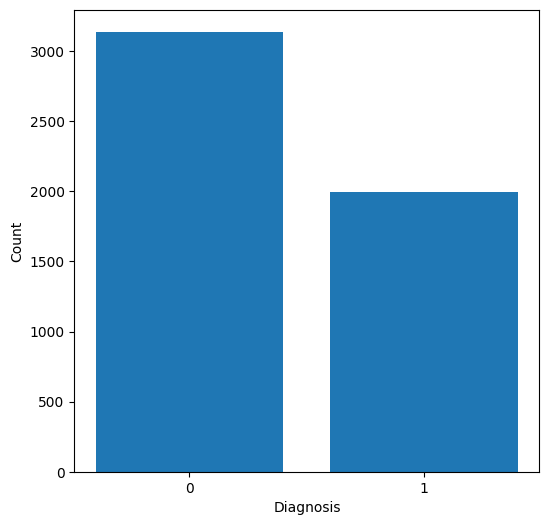

In [15]:
plt.figure(figsize=(6,6))
plt.bar(df['Diagnosis'].unique(), df['Diagnosis'].value_counts(), data=df)
plt.xticks([0, 1])
plt.xlabel("Diagnosis")
plt.ylabel("Count")
plt.show()

In [16]:
df['Gender'].value_counts()

Gender
0    3256
1    1876
Name: count, dtype: int64

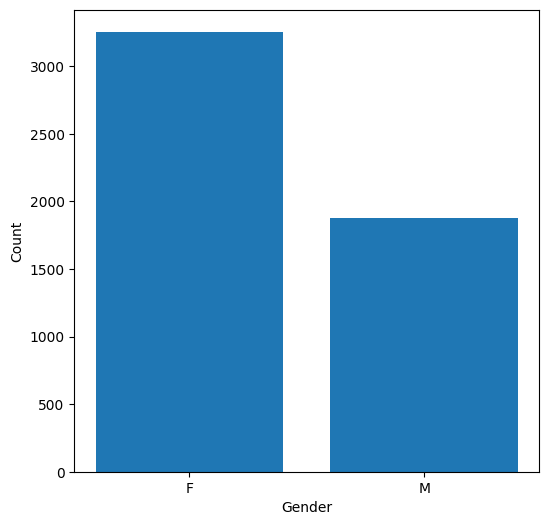

In [17]:
plt.figure(figsize=(6,6))
plt.bar(["F","M"], df['Gender'].value_counts())
plt.xlabel("Gender")
plt.ylabel("Count")
plt.show()

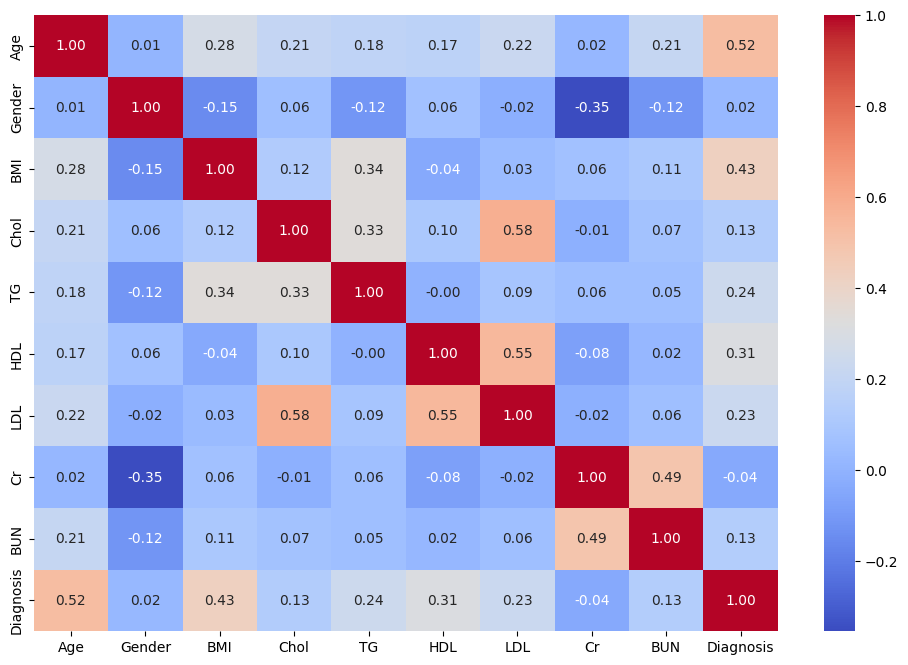

In [18]:
plt.figure(figsize=(12,8))
sns.heatmap(df.corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.show()

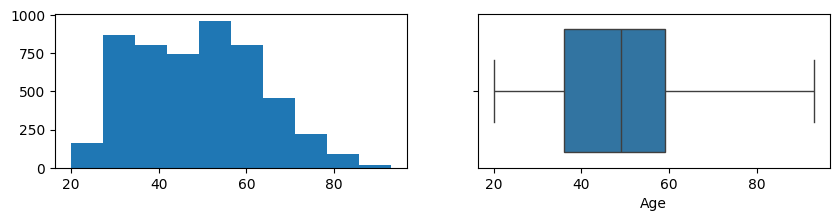

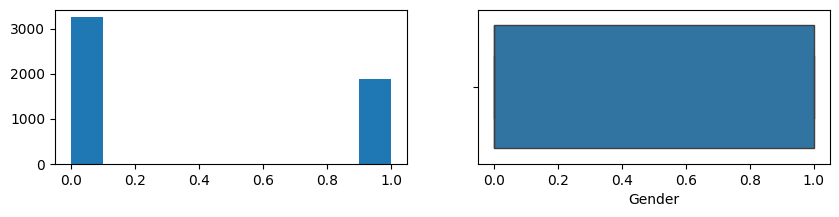

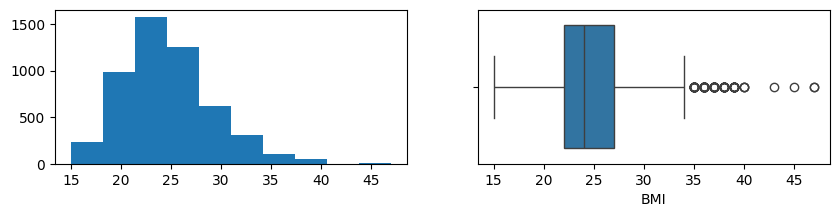

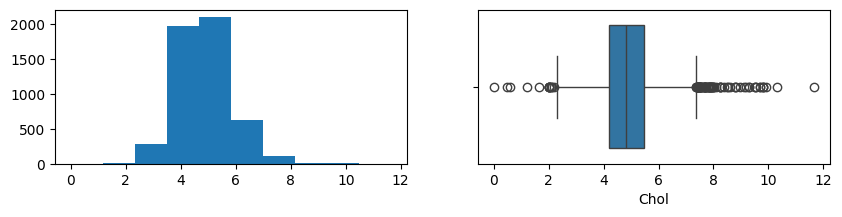

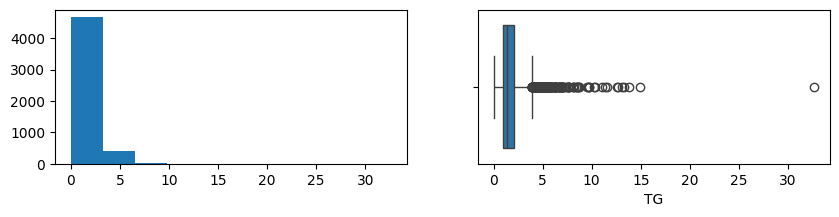

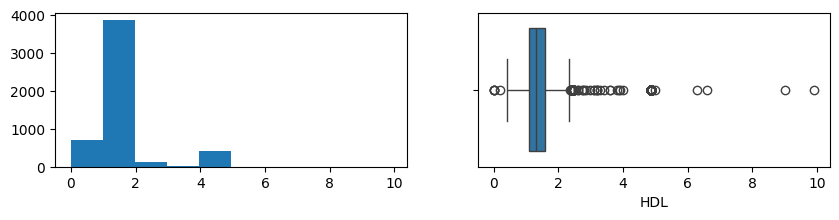

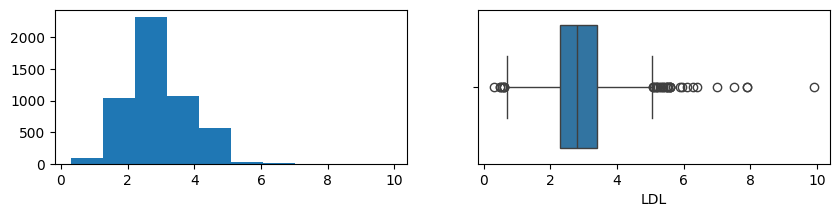

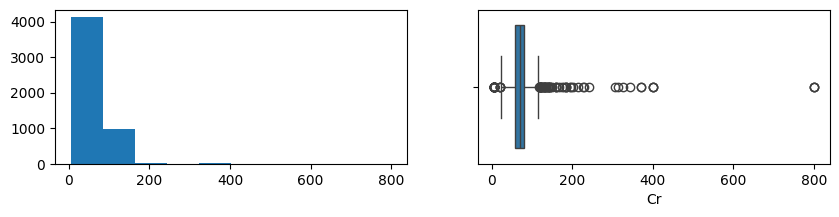

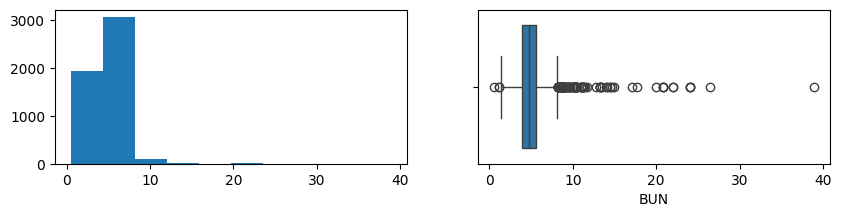

In [19]:
for i in range(9):
    plt.figure(figsize=(10,2))
    plt.subplot(1,2,1)
    df.iloc[:, i].hist(grid=False)
    plt.subplot(1,2,2)
    sns.boxplot(x=df.iloc[:, i])
    plt.show()

In [20]:
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, StandardScaler

In [21]:
X = df.drop(['Diagnosis'], axis=1)
y = df['Diagnosis']

In [22]:
min_max_scaler = MinMaxScaler()

X = min_max_scaler.fit_transform(X)

standard_scaler = StandardScaler()

X_normalized_standardized = standard_scaler.fit_transform(X)

In [23]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,shuffle=True)

In [24]:
y_train = y_train.astype(bool)
y_test = y_test.astype(bool)

In [25]:
from keras.models import Sequential
from keras.layers import Dense

In [26]:
model = Sequential()
model.add(Dense(32, activation='relu', input_shape=(X_train.shape[1],)))
model.add(Dense(24, activation='relu'))
model.add(Dense(24, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

In [27]:
model.compile(optimizer='RMSprop', loss='binary_crossentropy', metrics=['accuracy'])

In [28]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 32)                320       
                                                                 
 dense_1 (Dense)             (None, 24)                792       
                                                                 
 dense_2 (Dense)             (None, 24)                600       
                                                                 
 dense_3 (Dense)             (None, 1)                 25        
                                                                 
Total params: 1737 (6.79 KB)
Trainable params: 1737 (6.79 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


Epoch 1/300
129/129 [==============================] - 5s 17ms/step - loss: 0.6437 - accuracy: 0.6438 - val_loss: 0.5790 - val_accuracy: 0.6943
Epoch 2/300
129/129 [==============================] - 1s 8ms/step - loss: 0.5033 - accuracy: 0.7803 - val_loss: 0.4634 - val_accuracy: 0.7780
Epoch 3/300
129/129 [==============================] - 0s 3ms/step - loss: 0.4241 - accuracy: 0.8105 - val_loss: 0.4254 - val_accuracy: 0.8033
Epoch 4/300
129/129 [==============================] - 0s 3ms/step - loss: 0.4060 - accuracy: 0.8146 - val_loss: 0.4208 - val_accuracy: 0.7984
Epoch 5/300
129/129 [==============================] - 0s 3ms/step - loss: 0.3994 - accuracy: 0.8156 - val_loss: 0.4199 - val_accuracy: 0.8072
Epoch 6/300
129/129 [==============================] - 0s 3ms/step - loss: 0.3956 - accuracy: 0.8139 - val_loss: 0.3996 - val_accuracy: 0.8130
Epoch 7/300
129/129 [==============================] - 0s 3ms/step - loss: 0.3922 - accuracy: 0.8151 - val_loss: 0.3905 - val_accuracy: 0.811

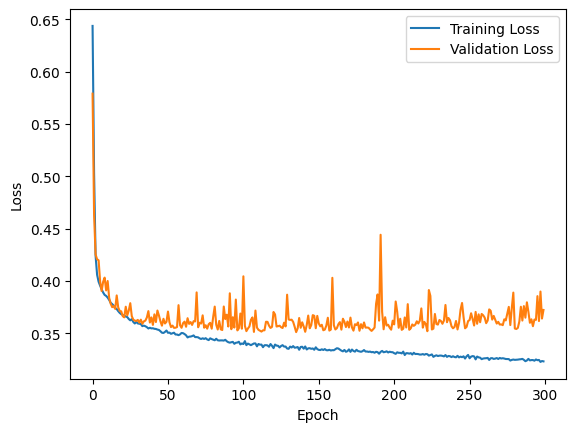

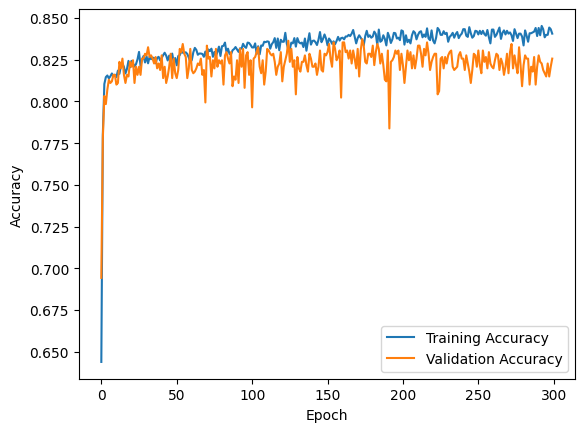

In [29]:
import matplotlib.pyplot as plt

history = model.fit(X_train, y_train, batch_size=32, validation_data=(X_test, y_test), epochs=300)

plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [30]:
loss, accuracy = model.evaluate(X_test, y_test)

print('Accuracy on the test:', accuracy)

33/33 [==============================] - 0s 3ms/step - loss: 0.3724 - accuracy: 0.8257
Accuracy on the test: 0.8257059454917908


Using traditional models

In [31]:
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.utils import shuffle

In [32]:
rfc = RandomForestClassifier(random_state=42, n_jobs=-1)
svc = SVC(random_state=42)
knn = KNeighborsClassifier(n_neighbors=9, n_jobs=-1)
dt = DecisionTreeClassifier(random_state=42)

In [33]:
X, y = shuffle(X, y, random_state=42)

In [34]:
rfc_predict = cross_val_predict(rfc, X, y, cv=5)
svc_predict = cross_val_predict(svc, X, y, cv=5)
knn_predict = cross_val_predict(knn, X, y, cv=5)
dt_predict = cross_val_predict(dt, X, y, cv=5)

In [35]:
print("Random Forest Acurácia Média: {:.1f}%".format((accuracy_score(y, rfc_predict)) * 100))
print("SVC Acurácia Média: {:.1f}%".format((accuracy_score(y, svc_predict)) * 100))
print("KNN Acurácia Média: {:.1f}%".format((accuracy_score(y, knn_predict)) * 100))
print("Decision Tree Acurácia Média: {:.1f}%".format((accuracy_score(y, dt_predict)) * 100))

Random Forest Acurácia Média: 83.0%
SVC Acurácia Média: 82.6%
KNN Acurácia Média: 81.4%
Decision Tree Acurácia Média: 77.4%


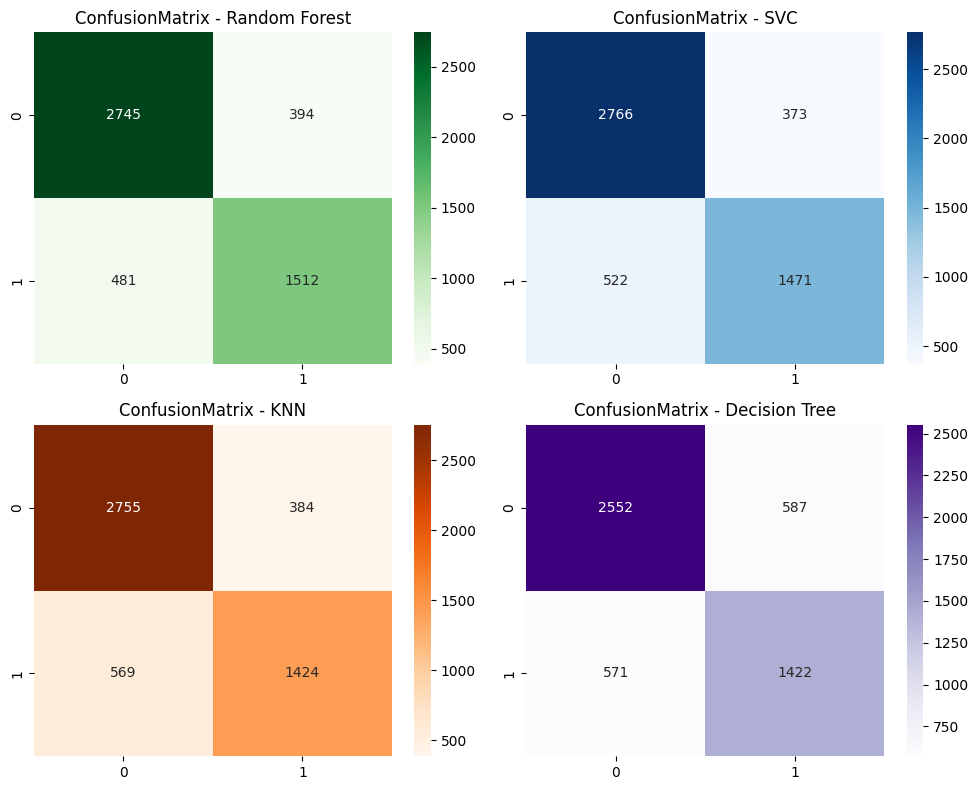

In [36]:
cmRFC = confusion_matrix(y, rfc_predict)
cmSVC = confusion_matrix(y, svc_predict)
cmKNN = confusion_matrix(y, knn_predict)
cmDT = confusion_matrix(y, dt_predict)

fig, axes = plt.subplots(2, 2, figsize=(10, 8))

sns.heatmap(cmRFC, annot=True, cmap='Greens', fmt='g', ax=axes[0, 0])
axes[0, 0].set_title('ConfusionMatrix - Random Forest')

sns.heatmap(cmSVC, annot=True, cmap='Blues', fmt='g', ax=axes[0, 1])
axes[0, 1].set_title('ConfusionMatrix - SVC')

sns.heatmap(cmKNN, annot=True, cmap='Oranges', fmt='g', ax=axes[1, 0])
axes[1, 0].set_title('ConfusionMatrix - KNN')

sns.heatmap(cmDT, annot=True, cmap='Purples', fmt='g', ax=axes[1, 1])
axes[1, 1].set_title('ConfusionMatrix - Decision Tree')

plt.tight_layout()

plt.show()